In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv('../Algerian_forest_fires_clean_dataset.csv')
df.drop(['day','month','year'],axis=1,inplace=True)

df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


Selecting dependent and independent features

In [3]:
#Independent features
X = df.drop('FWI',axis=1)
y=df['FWI']

Train/Test split

In [4]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
X_train.shape

(182, 11)

Feature selection

In [5]:
def correlation(dataset,treshold):
    col_corr=set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>treshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [6]:
correlation(X_train,0.85)
df.drop(['BUI','DC'],axis=1,inplace=True)

Feature scaling / Standardization

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Linear regression 

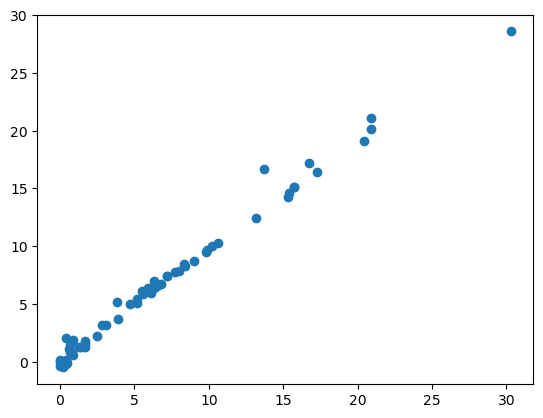

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

linear_regression = LinearRegression()
linear_regression.fit(X_train_scaled, y_train)
y_pred = linear_regression.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
plt.scatter(y_test, y_pred)

Lasso regression

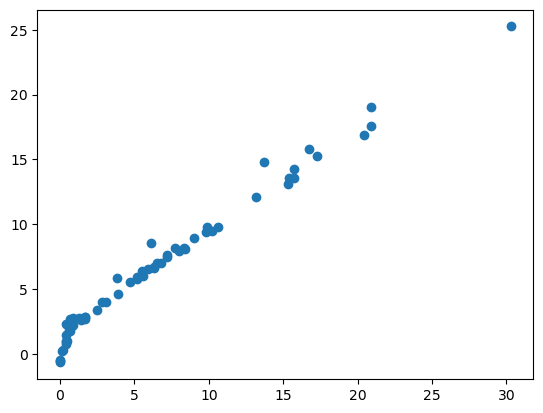

In [9]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error

lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
plt.scatter(y_test, y_pred)

Cross validation with LassoCV

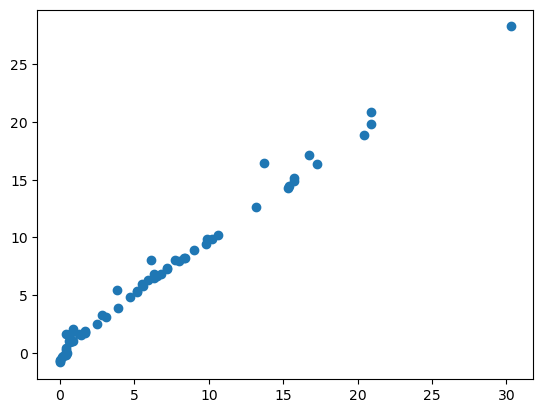

In [10]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(cv=5)
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)
plt.scatter(y_test, y_pred)

Pickling the model 

In [11]:
import pickle

pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(linear_regression,open('linear_regression.pkl','wb'))